<a href="https://colab.research.google.com/github/HumayDS/Digital-Data-Analytics-spring-2024-/blob/main/Lesson%2013-%20End%20to%20end%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import recall_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/Churn_Modelling.csv')
df.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2,3,15619304,Onio,502,NaN,Female,42,8,159660.80,3,1,0,113931.57,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Get unique count for each variable
df.nunique()

Unnamed: 0         10000
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
## Save customer ids
Customer_id = df['CustomerId']

In [ ]:
## Drop irrelevant columns
df = df.drop(['Unnamed: 0' , 'RowNumber' , 'CustomerId','Surname'] , axis = 1)

In [ ]:
##Get type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        9999 non-null   object 
 2   Gender           9999 non-null   object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.isnull().sum()

CreditScore        0
Geography          1
Gender             1
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Checking na's and its percentages
# as df.isnull().sum()
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Geography,1,0.0001
Gender,1,0.0001
CreditScore,0,0.0000
Age,0,0.0000
Tenure,0,0.0000
Balance,0,0.0000
NumOfProducts,0,0.0000
HasCrCard,0,0.0000
IsActiveMember,0,0.0000
EstimatedSalary,0,0.0000


In [ ]:
## Check na's percentage 2x
df.isnull().mean()

CreditScore        0.0000
Geography          0.0001
Gender             0.0001
Age                0.0000
Tenure             0.0000
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

In [ ]:
##Imputate gender with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


In [ ]:
 	##Imputate Geography with mode
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])

In [ ]:
##Check nulls again
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
## Save dataset as csv format
df.to_csv('df.clear.csv')

In [ ]:
##Check statistical results
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Text(0.5, 1.0, 'boxplot')

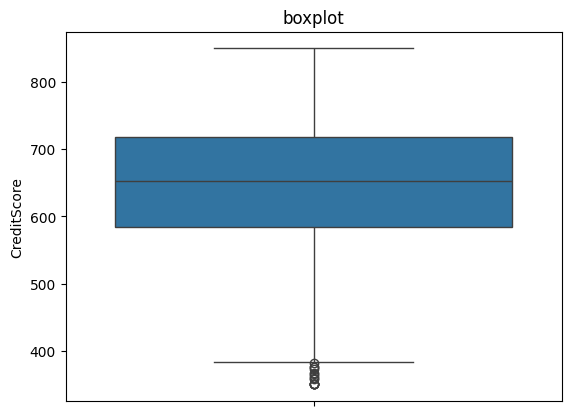

In [ ]:
##Check outliers
import seaborn as sns
sns.boxplot(y='CreditScore',data=df).set_title("boxplot")



In [ ]:
##1 Quartile
Q1 = np.percentile(df['CreditScore'], 25, method='midpoint')
Q1

584.0

In [ ]:
##3 Quartile
Q3 = np.percentile(df['CreditScore'], 75, method='midpoint')
Q3

718.0

In [ ]:
##IQR Interquantile Range
IQR = Q3 - Q1

In [ ]:
## Low  Bound  = Q1 - 1.5*IQR
## Upper Bound = Q3 + 1.5*IQR
low_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(low_bound)
print(upper_bound)

383.0
919.0


In [ ]:
# prompt: filter df.CreditScore > low bound and  df.CreditScore > upper_bound

df_filtered = df[ (df['CreditScore'] > low_bound) & (df['CreditScore'] < upper_bound) ]


In [ ]:
df.shape

(10000, 11)

In [ ]:
df_filtered.shape

(9984, 11)

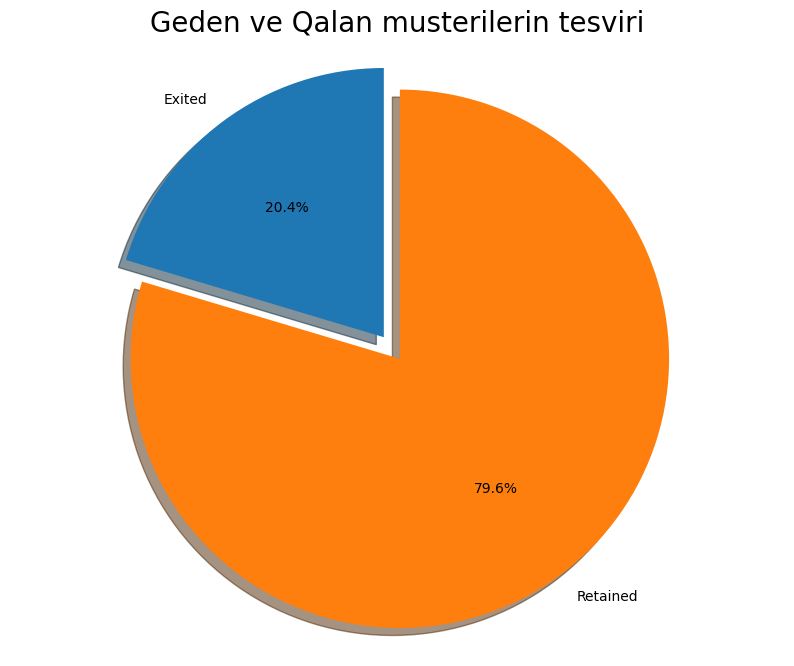

In [ ]:
##Pie chart
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Geden ve Qalan musterilerin tesviri", size = 20)
plt.show()

In [ ]:
## Group by with Geography
df.groupby('Geography')['Exited'].agg(['count', 'sum'])

,count,sum
Geography,,
France,5014,810
Germany,2509,814
Spain,2477,413


In [ ]:
##Show percentage
g = df.groupby('Geography')['Exited'].agg(['count', 'sum'])
g.index.name = None
g['Perc'] = g['sum']/g['count']
g

,count,sum,Perc
France,5014,810,0.161548
Germany,2509,814,0.324432
Spain,2477,413,0.166734


In [ ]:
##Check for gendeer
ge = df.groupby('Gender')['Exited'].agg(['count', 'sum'])
ge.index.name = None
ge['Perc'] = ge['sum']/ge['count']
ge

,count,sum,Perc
Female,4542,1139,0.250771
Male,5458,898,0.164529


In [ ]:
## Check for credit card
cr = df.groupby('HasCrCard')['Exited'].agg(['count', 'sum'])
cr.index.name = None
cr['Perc'] = cr['sum']/cr['count']
cr

,count,sum,Perc
0,2945,613,0.208149
1,7055,1424,0.201843


In [ ]:
#Check for active member
am = df.groupby('IsActiveMember')['Exited'].agg(['count', 'sum'])
am.index.name = None
am['Perc'] = cr['sum']/cr['count']
am

,count,sum,Perc
0,4849,1302,0.208149
1,5151,735,0.201843


<Axes: xlabel='IsActiveMember', ylabel='count'>

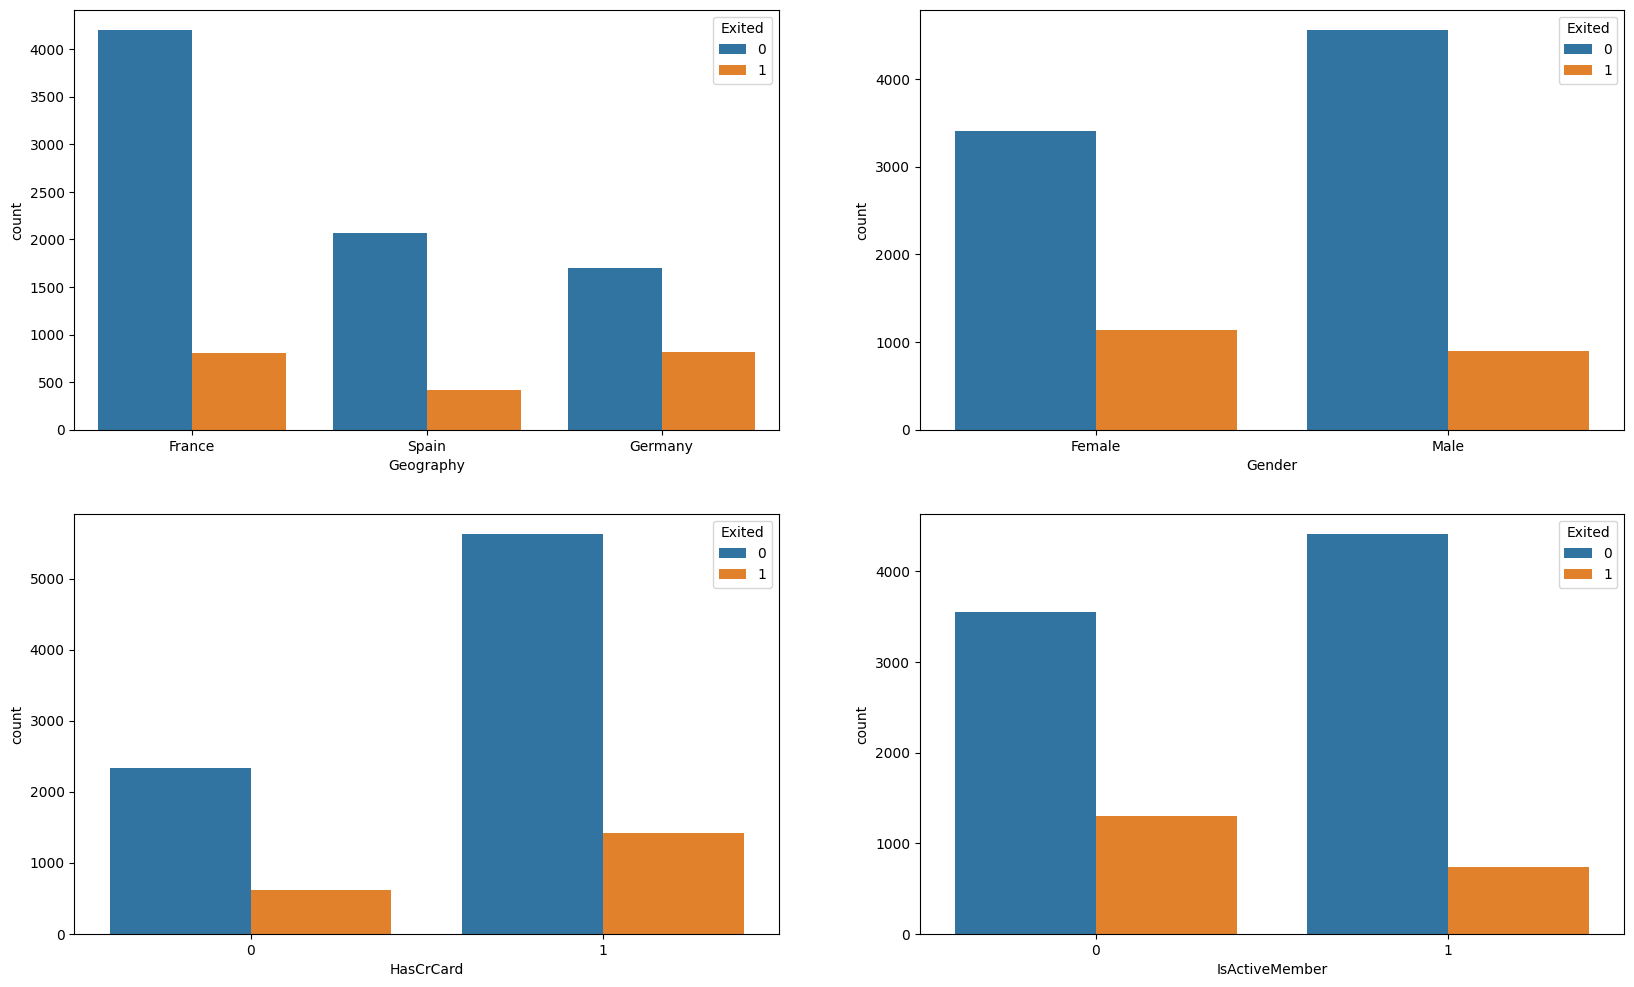

In [ ]:
    # Check Total view
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

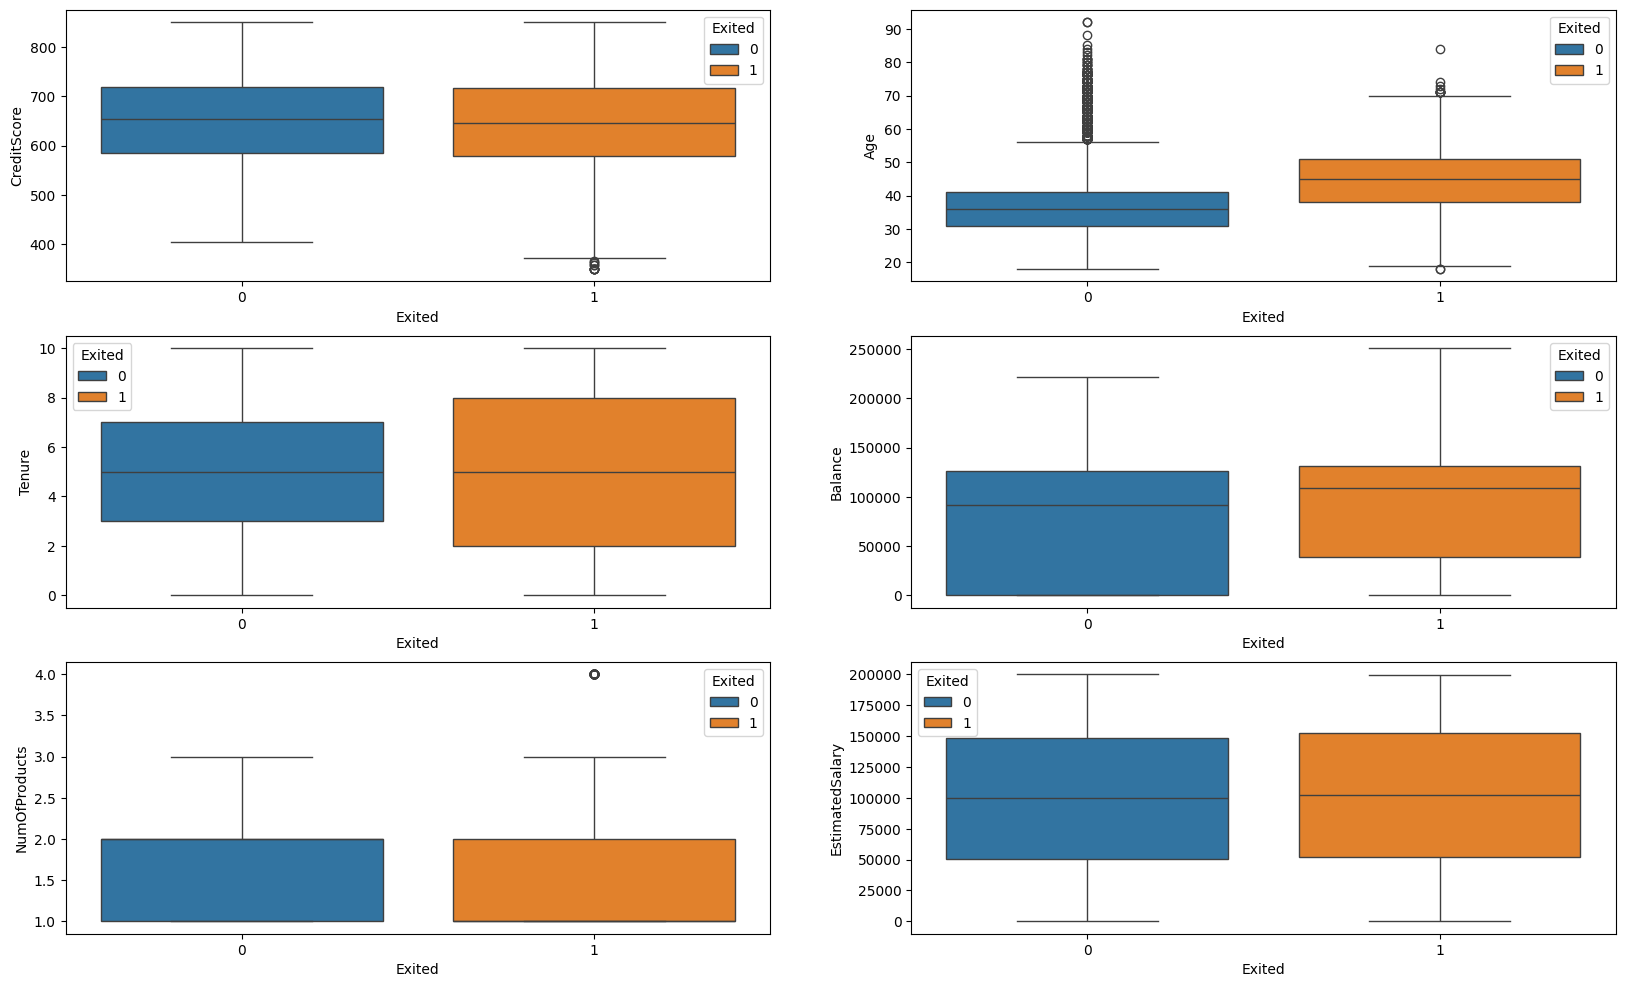

In [ ]:
    # Check boxplot
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [ ]:
#Create dummy variables
dmy = pd.get_dummies(df.select_dtypes('object') ,  drop_first = True)
dmy.head()
cat_columns = df.select_dtypes('object')
num_cols = df.drop(cat_columns , axis = 1)
df = pd.concat([num_cols , dmy] , axis= 1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
# Determine X and y
y = df["Exited"]
X = df.drop(["Exited"], axis=1)

In [ ]:
#Split test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [ ]:
##Create logistic regression for train
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model


LogisticRegression(solver='liblinear')

In [ ]:
#Preict train
predictions_train = loj_model.predict(X_train)
predictions_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
##Get probability
y_probs = loj_model.predict_proba(X_train)
y_probs = y_probs[:,1]
y_probs

array([0.21157994, 0.18568677, 0.157452  , ..., 0.11605717, 0.27759662,
       0.34685202])

In [ ]:
##Evaluate over train
accuracy_score(y_train, predictions_train)

0.784

In [ ]:
##Get test predictions
predictions_test = loj_model.predict(X_test)


In [ ]:
##Get test predictions
predictions_test_proba = loj_model.predict_proba(X_test)

In [ ]:
##Get Accuracy for test
accuracy_score(y_test, predictions_test)

0.8

In [ ]:
predictions_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test['preds'] = predictions_test

In [ ]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,preds
6252,596,32,3,96709.07,2,0,0,41788.37,True,False,True,0
4684,623,43,1,0.00,2,1,1,146379.30,False,False,True,0
1731,601,44,4,0.00,2,1,0,58561.31,False,True,False,0
4742,506,59,8,119152.10,2,1,1,170679.74,True,False,True,1
4521,560,27,7,124995.98,1,1,1,114669.79,False,True,False,0


In [ ]:
##Get list who are going to churn
Churns = X_test[(X_test['preds'] == 1)]
Churns.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,preds
4742,506,59,8,119152.10,2,1,1,170679.74,True,False,True,1
3337,579,56,4,99340.83,1,0,0,4523.74,False,True,True,1
35,475,45,0,134264.04,1,1,0,27822.99,False,False,False,1
9753,656,68,7,153545.11,1,1,1,186574.68,True,False,True,1
952,571,66,9,111577.01,1,0,1,189271.90,True,False,False,1


In [ ]:
Churns.shape

(122, 12)

In [ ]:
Customer_id[Churns.index]

4742    15762134
3337    15647385
35      15794171
9753    15705174
952     15606149
7058    15671769
8965    15811032
2908    15570769
416     15720559
7548    15658504
2615    15700209
2458    15813303
1253    15699523
624     15745307
1631    15685372
6968    15721793
6289    15773276
9102    15810942
7144    15577515
9765    15777067
8674    15719426
3387    15798024
4438    15583850
3396    15720354
3314    15628767
2614    15640846
7636    15673238
5606    15741988
8762    15765173
6997    15689061
4638    15659399
252     15793726
4313    15687079
8103    15740223
6561    15650538
4170    15605665
2473    15679249
9171    15660475
7949    15617486
5576    15635964
1981    15630913
6255    15589017
5639    15801316
7142    15654859
8207    15635125
2748    15753332
7692    15807889
747     15587535
347     15747358
6221    15603554
3782    15680449
7063    15766183
3615    15639357
7793    15798885
3497    15588944
1285    15658532
653     15664610
1543    15747677
3206    155967

In [ ]:
Churn_customers_id = Customer_id[Churns.index]

In [ ]:
Churn_customers_id.to_csv('churns.csv')